# 作業
- 作業目標 : 用 iris (dataset.load_iris()) 資料嘗試跑 hierarchical clustering

In [1]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

iris.keys()
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

載入 相關套件 並 執行 hierarchical clustering 實驗 ...

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering

#?AgglomerativeClustering

## 設定模型參數

In [3]:
estimators = [('hc_complete', AgglomerativeClustering(n_clusters=3, linkage='complete')),
            ('hc_average', AgglomerativeClustering(n_clusters=3, linkage='average')),
            ('hc_single', AgglomerativeClustering(n_clusters=3, linkage='single'))]

## 分群後視覺化效果

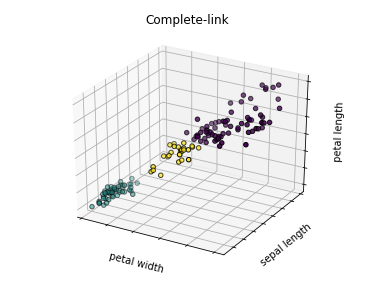

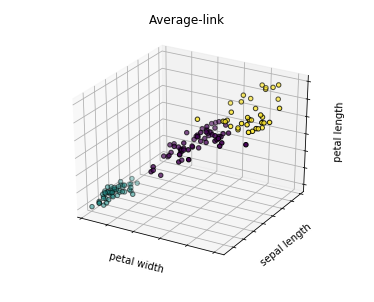

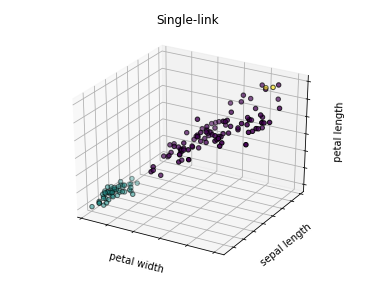

In [4]:
fignum = 1 
titles = ['Complete-link', 'Average-link','Single-link']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(5,4))
    ax = Axes3D(fig)
    
    # 訓練資料
    est.fit(X)
    labels = est.labels_
    
    ax.scatter(X[:,3], X[:,0], X[:,2],
              c =labels.astype(np.float), edgecolor ='k')
    
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('petal width')
    ax.set_ylabel('sepal length')
    ax.set_zlabel('petal length')
    ax.set_title(titles[fignum -1])
    ax.dist = 12
    fignum = fignum + 1

### 原始資料Label分群

C:\Users\freet\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


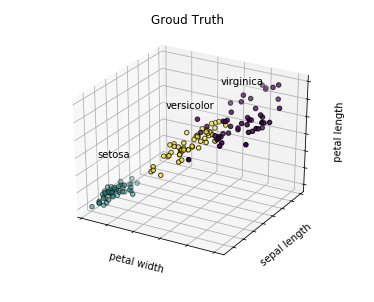

In [5]:
# Plot the ground truth
fig = plt.figure(fignum, figsize=(5,4))
ax = Axes3D(fig)

for name, label in[('setosa',0),('versicolor',1),('virginica',2)]:
    ax.text3D(X[y== label, 3].mean(), X[y== label, 0].mean(), X[y== label, 2].mean() +2,
             name, horizontalalignment='center', bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))

# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('petal width')
ax.set_ylabel('sepal length')
ax.set_zlabel('petal length')
ax.set_title('Groud Truth')
ax.dist = 12

fig.show()